Import the required librarires

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from sklearn.compose import ColumnTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import category_encoders as ce

df=pd.read_csv("C:/Users/USER/Desktop/cars_data.csv")
df.shape[0]


7777

We have 7777 rows of data that contain a lot of columns that are totally useless because all of its columns are NaN so we need to drop them

Drop All the rows that all of its data are NaN , After that we have reached to 6864 data rows instead of 7777 

In [124]:
df=df.dropna(how='all')

In [125]:
df.isna().any()
percentage_of_missing_data=df.isna().sum()/df.shape[0]
percentage_of_missing_data


Price           0.000000
Model           0.000000
Year            0.000000
لون السيارة     0.000000
نوع الوقود      0.000000
أصل السيارة     0.000000
رخصة السيارة    0.000000
نوع الجير       0.000000
الزجاج          0.000000
قوة الماتور     0.000000
عداد السيارة    0.282780
عدد الركاب      0.113199
وسيلة الدفع     0.000000
معروضة          0.000000
أصحاب سابقون    0.240385
إضافات          0.072990
dtype: float64

Printing the Percentage of the missing data 


We have now FOUR features with missing values :
عداد السيارة, عدد الركاب , اصحاب سابقون ,اضافات

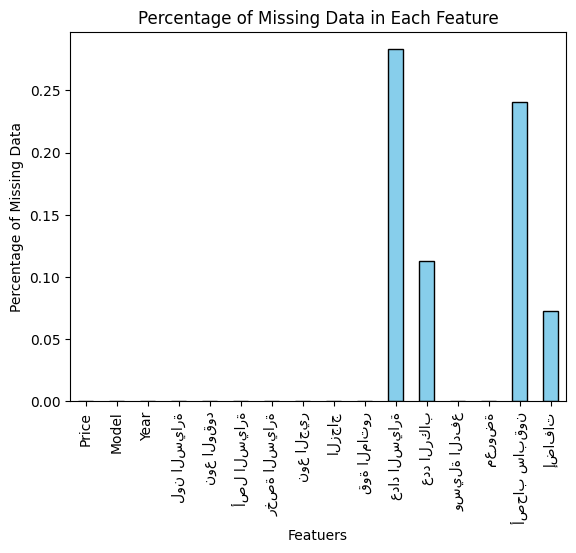

In [126]:
percentage_of_missing_data=df.isna().sum()/df.shape[0]
percentage_of_missing_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Featuers')
plt.ylabel('Percentage of Missing Data')
plt.title('Percentage of Missing Data in Each Feature')

plt.show()

First start with the features number of seats, we need first to convert the data to numerical one and then fill the missing data with KNN


In [127]:
df["عداد السيارة"].value_counts()

عداد السيارة
100000            107
200000            103
50000              75
00000              73
75000              69
                 ... 
203000كيلو متر      1
148372              1
0 صفر كيلو          1
40300               1
7686866             1
Name: count, Length: 1224, dtype: int64

In [128]:
import re

def convert_to_numeric(data):
    numbers = re.findall(r'\d+', str(data))   
    return sum(map(int, numbers)) if numbers else np.nan

df['عدد الركاب'] = df['عدد الركاب'].apply(convert_to_numeric)


Drop all the additions for the car except for "فتحة السقف" and turn binarize it 

In [129]:
df["إضافات"]=df["إضافات"].fillna("")
df["فتحة سقف"]=df["إضافات"].apply(lambda x: 1 if "فتحة سقف" in x else 0)
df=df.drop(columns=["إضافات"])
df


,Price,Model,Year,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,فتحة سقف
0,['100000'],كيا اوبتيما,2014.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,5.0,نقدا فقط,للبيع فقط,يد اولى,1
3,['60000'],كيا سورينتو,2007.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,8.0,إمكانية التقسيط,للبيع أو التبديل,2,1
4,['43500'],هونداي افانتي,2006.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,0
6,['5500'],فيات 127,1982.0,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,5.0,إمكانية التقسيط,للبيع فقط,00,0
7,['54000'],بيجو 208,2014.0,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,5.0,نقدا فقط,للبيع فقط,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,['45000'],كيا مورننغ,2015.0,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000.0,130000,5.0,إمكانية التقسيط,للبيع فقط,2,0
7772,['48000'],فورد ترانزيت,2002.0,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400.0,00000,8.0,نقدا فقط,للبيع فقط,5,0
7773,['87000'],بيجو بارتنر,2018.0,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600.0,50000,5.0,نقدا فقط,للبيع فقط,يد صفر,0
7774,['126000'],كيا سورينتو,2017.0,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,100,7.0,نقدا فقط,للبيع فقط,ثانيه,1


Dropping the "معروضة" column

In [130]:
df=df.drop(columns=["معروضة", "وسيلة الدفع"])


Turning the data type of the price into number (fix a bug in the data extraction code)


In [131]:
df["Price"] = df["Price"].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) else x)
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')



cleaning the noisy data in the model feature and split it into to features : brand and model of the car

In [132]:
for index, row in df.iterrows():
    if "بي ام دبليو" in row['Model']:
        df.at[index, 'car_brand'] = "BMW"
        df.at[index, 'car_model'] = row['Model'].replace("بي ام دبليو", '').strip()
        
    elif "جي ام سي" in row['Model']:
        df.at[index, 'car_brand'] = "GMC"
        df.at[index, 'car_model'] = row['Model'].replace("جي ام سي", '').strip()

    elif "الفا روميو" in row['Model']:
        df.at[index,'car_brand']="الفا روميو"
        df.at[index, 'car_model'] = row['Model'].replace("الفا روميو", '').strip()

    elif "رانج" in row['Model']:
        df.at[index,'car_brand']="لاندروفر"
        df.at[index, 'car_model'] ="رينج روفر"

    else:
        brand, model = row['Model'].split(maxsplit=1)
        df.at[index, 'car_brand'] = brand
        df.at[index, 'car_model'] = model

df['car_model'] = df['car_model'].apply(lambda x: x.replace('BMW', '').strip() if pd.notna(x) else x)
df['car_model'] = df['car_model'].apply(lambda x: x.replace('ام سي ', '').strip() if pd.notna(x) else x)


C:\Users\USER\AppData\Local\Temp\ipykernel_4080\426595950.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'كيا' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'car_brand'] = brand
C:\Users\USER\AppData\Local\Temp\ipykernel_4080\426595950.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'اوبتيما' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'car_model'] = model


In [133]:
df["car_brand"].unique()

array(['كيا', 'هونداي', 'فيات', 'بيجو', 'BMW', 'اوبل', 'مرسيدس', 'فورد',
       'نيسان', 'سكودا', 'فولكسفاجن', 'هوندا', 'دايو', 'شفروليه', 'رينو',
       'جييب', 'دراجة', 'ستروين', 'فولفو', 'مازدا', 'ايسوزو', 'سانغ',
       'سيت', 'تويوتا', 'سوبارو', 'ميتسوبيشي', 'اودي', 'شاحنة', 'داف',
       'سوزوكي', 'داتشيا', 'GMC', 'كاديلاك', 'لاندروفر', 'روفر', 'باص',
       'أفيكو', 'Dodge', 'ديهاتسو', 'الفا روميو', 'جاجوار'], dtype=object)

Dropping the Model feature

In [134]:
df=df.drop(columns="Model")


Translating the feature names into english

In [135]:
df.rename(columns={'لون السيارة': 'color',
                    'نوع الوقود': 'gas_type',
                      'نوع الجير': 'gear_type',
                      'رخصة السيارة':"car_license",
                      'أصل السيارة':"car_origin",
                      "الزجاج":"car_glass_type",
                      "قوة الماتور":"engine_power",
                      "عداد السيارة":"odometer",
                      "عدد الركاب":"seating_capacity",
                      "أصحاب سابقون":"number_of_owners",
                      "فتحة سقف":"sunroof",




                        }, inplace=True)


Dropping the number_of_owners feature from the prototype

In [136]:
df.drop(columns="number_of_owners",inplace=True)


Filling the feature "odometer" with the mean of the training data

In [137]:
df["odometer"] = pd.to_numeric(df["odometer"].replace('None', pd.NA).str.extract('(\d+)', expand=False), errors='coerce')
df["odometer"] = df["odometer"].apply(lambda x: x * 1000 if pd.notna(x) and x < 1000 else x)
df = df.drop(df[(df["odometer"] <= 10000) & (df["odometer"] >= 1000)].index)
df = df[df['odometer'].notna()]
condition = ((df["odometer"] < 10000) | (df["odometer"] > 1000000))
df.drop(df[condition].index, inplace=True)
df["odometer"]

0        75000.0
3       130000.0
7        38000.0
10       50000.0
14       56000.0
          ...   
7764     20000.0
7769     50000.0
7771    130000.0
7773     50000.0
7774    100000.0
Name: odometer, Length: 3684, dtype: float64

dropping the outliers of the feature seating capacity

In [138]:
#modify #tareq

df['seating_capacity'].replace('None', pd.NA, inplace=True)
df['seating_capacity'].replace(0, pd.NA, inplace=True)
df['seating_capacity'] = pd.to_numeric(df['seating_capacity'], errors='coerce')

def replace_none_with_mode(group):
    mode_value = group['seating_capacity'].mode().iloc[0] if not group['seating_capacity'].mode().empty else pd.NA
    group['seating_capacity'].fillna(mode_value, inplace=True)
    return group

df = df.groupby('car_model', group_keys=False).apply(replace_none_with_mode)
df.dropna(subset=['seating_capacity'], inplace=True)
def replace_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mode_value = group.mode().iloc[0]
    return group.apply(lambda x: mode_value if x < lower_bound or x > upper_bound else x)

df['seating_capacity'] = df.groupby('car_model')['seating_capacity'].transform(replace_outliers)

Dropping the cars where the origin of it isnt private or taxi and then binarize the feature
so it becomes 1 if its origin is private and 0 if its origin is taxi

In [139]:
df = df[df["car_origin"] != "حكومي"]
df = df[df["car_origin"] != "تجاري"]
df = df[df["car_origin"] != "تأجير"]

df = df[df["car_origin"] != "تدريب سياقة"]
df["car_origin"] = df["car_origin"].replace({"خصوصي": 1, "عمومي": 0})
df["car_origin"] = df["car_origin"].astype(int)
df = df.rename(columns={"car_origin": "car_origin_private"})


On the car_license feature , there are less than 1% "نمرة صفراء" , we have to options , either to binarize it same as the car_origin feature as the following , or to drop the column where the car_license is not "فلسطينية" and then drop the whole feature , ive choosen the second option

In [140]:
#First approach :
#df["car_license"] = df["car_license"].replace({"فلسطينية": 1, "نمرة صفراء": 0})
#df["car_license"] = df["car_license"].astype(int)
#df = df.rename(columns={"car_license": "car_license_pal"})
##second approach
df = df[df["car_license"] != "نمرة صفراء"]
df.drop(columns="car_license",inplace=True)
df

,Price,Year,color,gas_type,car_origin_private,gear_type,car_glass_type,engine_power,odometer,seating_capacity,sunroof,car_brand,car_model
0,100000,2014.0,أبيض عاجي,بنزين,1,اوتوماتيك,الكتروني,2000.0,75000.0,5.0,1,كيا,اوبتيما
3,60000,2007.0,سكني,ديزل,1,نصف اوتوماتيك,الكتروني,2500.0,130000.0,7.0,1,كيا,سورينتو
7,54000,2014.0,فضي,بنزين,1,اوتوماتيك,الكتروني,1200.0,38000.0,5.0,0,بيجو,208
10,230000,2014.0,أبيض,بنزين,1,اوتوماتيك,الكتروني,2000.0,50000.0,5.0,1,مرسيدس,C200
14,84000,2003.0,أبيض,بنزين,1,عادي,الكتروني,4500.0,56000.0,8.0,0,نيسان,باترول
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,70000,2003.0,فضي,ديزل,1,اوتوماتيك,الكتروني,2700.0,20000.0,5.0,1,مرسيدس,E270
7769,48000,2018.0,أزرق سماوي,بنزين,1,اوتوماتيك,الكتروني,1000.0,50000.0,5.0,0,كيا,بيكانتو
7771,45000,2015.0,فيراني,كهرباء,1,اوتوماتيك,الكتروني,1000.0,130000.0,5.0,0,كيا,مورننغ
7773,87000,2018.0,فضي,ديزل,1,عادي,الكتروني,1600.0,50000.0,5.0,0,بيجو,بارتنر


Dropping the gear_type = half-auto

In [141]:
df["gear_type"].value_counts()
df = df[df["gear_type"] != "نصف اوتوماتيك"]


Dropping the color of the car feature

In [142]:
df.drop(columns="color",inplace=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_4080\4233966940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="color",inplace=True)


,Price,Year,gas_type,car_origin_private,gear_type,car_glass_type,engine_power,odometer,seating_capacity,sunroof,car_brand,car_model
0,100000,2014.0,بنزين,1,اوتوماتيك,الكتروني,2000.0,75000.0,5.0,1,كيا,اوبتيما
7,54000,2014.0,بنزين,1,اوتوماتيك,الكتروني,1200.0,38000.0,5.0,0,بيجو,208
10,230000,2014.0,بنزين,1,اوتوماتيك,الكتروني,2000.0,50000.0,5.0,1,مرسيدس,C200
14,84000,2003.0,بنزين,1,عادي,الكتروني,4500.0,56000.0,8.0,0,نيسان,باترول
15,75000,2005.0,ديزل,1,عادي,الكتروني,2500.0,460000.0,8.0,0,فورد,ترانزيت
...,...,...,...,...,...,...,...,...,...,...,...,...
7764,70000,2003.0,ديزل,1,اوتوماتيك,الكتروني,2700.0,20000.0,5.0,1,مرسيدس,E270
7769,48000,2018.0,بنزين,1,اوتوماتيك,الكتروني,1000.0,50000.0,5.0,0,كيا,بيكانتو
7771,45000,2015.0,كهرباء,1,اوتوماتيك,الكتروني,1000.0,130000.0,5.0,0,كيا,مورننغ
7773,87000,2018.0,ديزل,1,عادي,الكتروني,1600.0,50000.0,5.0,0,بيجو,بارتنر


Dropping all types of gas_types attribute except for بنزين and ديزل


In [143]:
df = df[df["gas_type"] != "كهرباء"]
df = df[df["gas_type"] != "هايبرد"]


In [144]:
df.drop(columns="car_glass_type",inplace=True)

the data plot after dropping the outliers

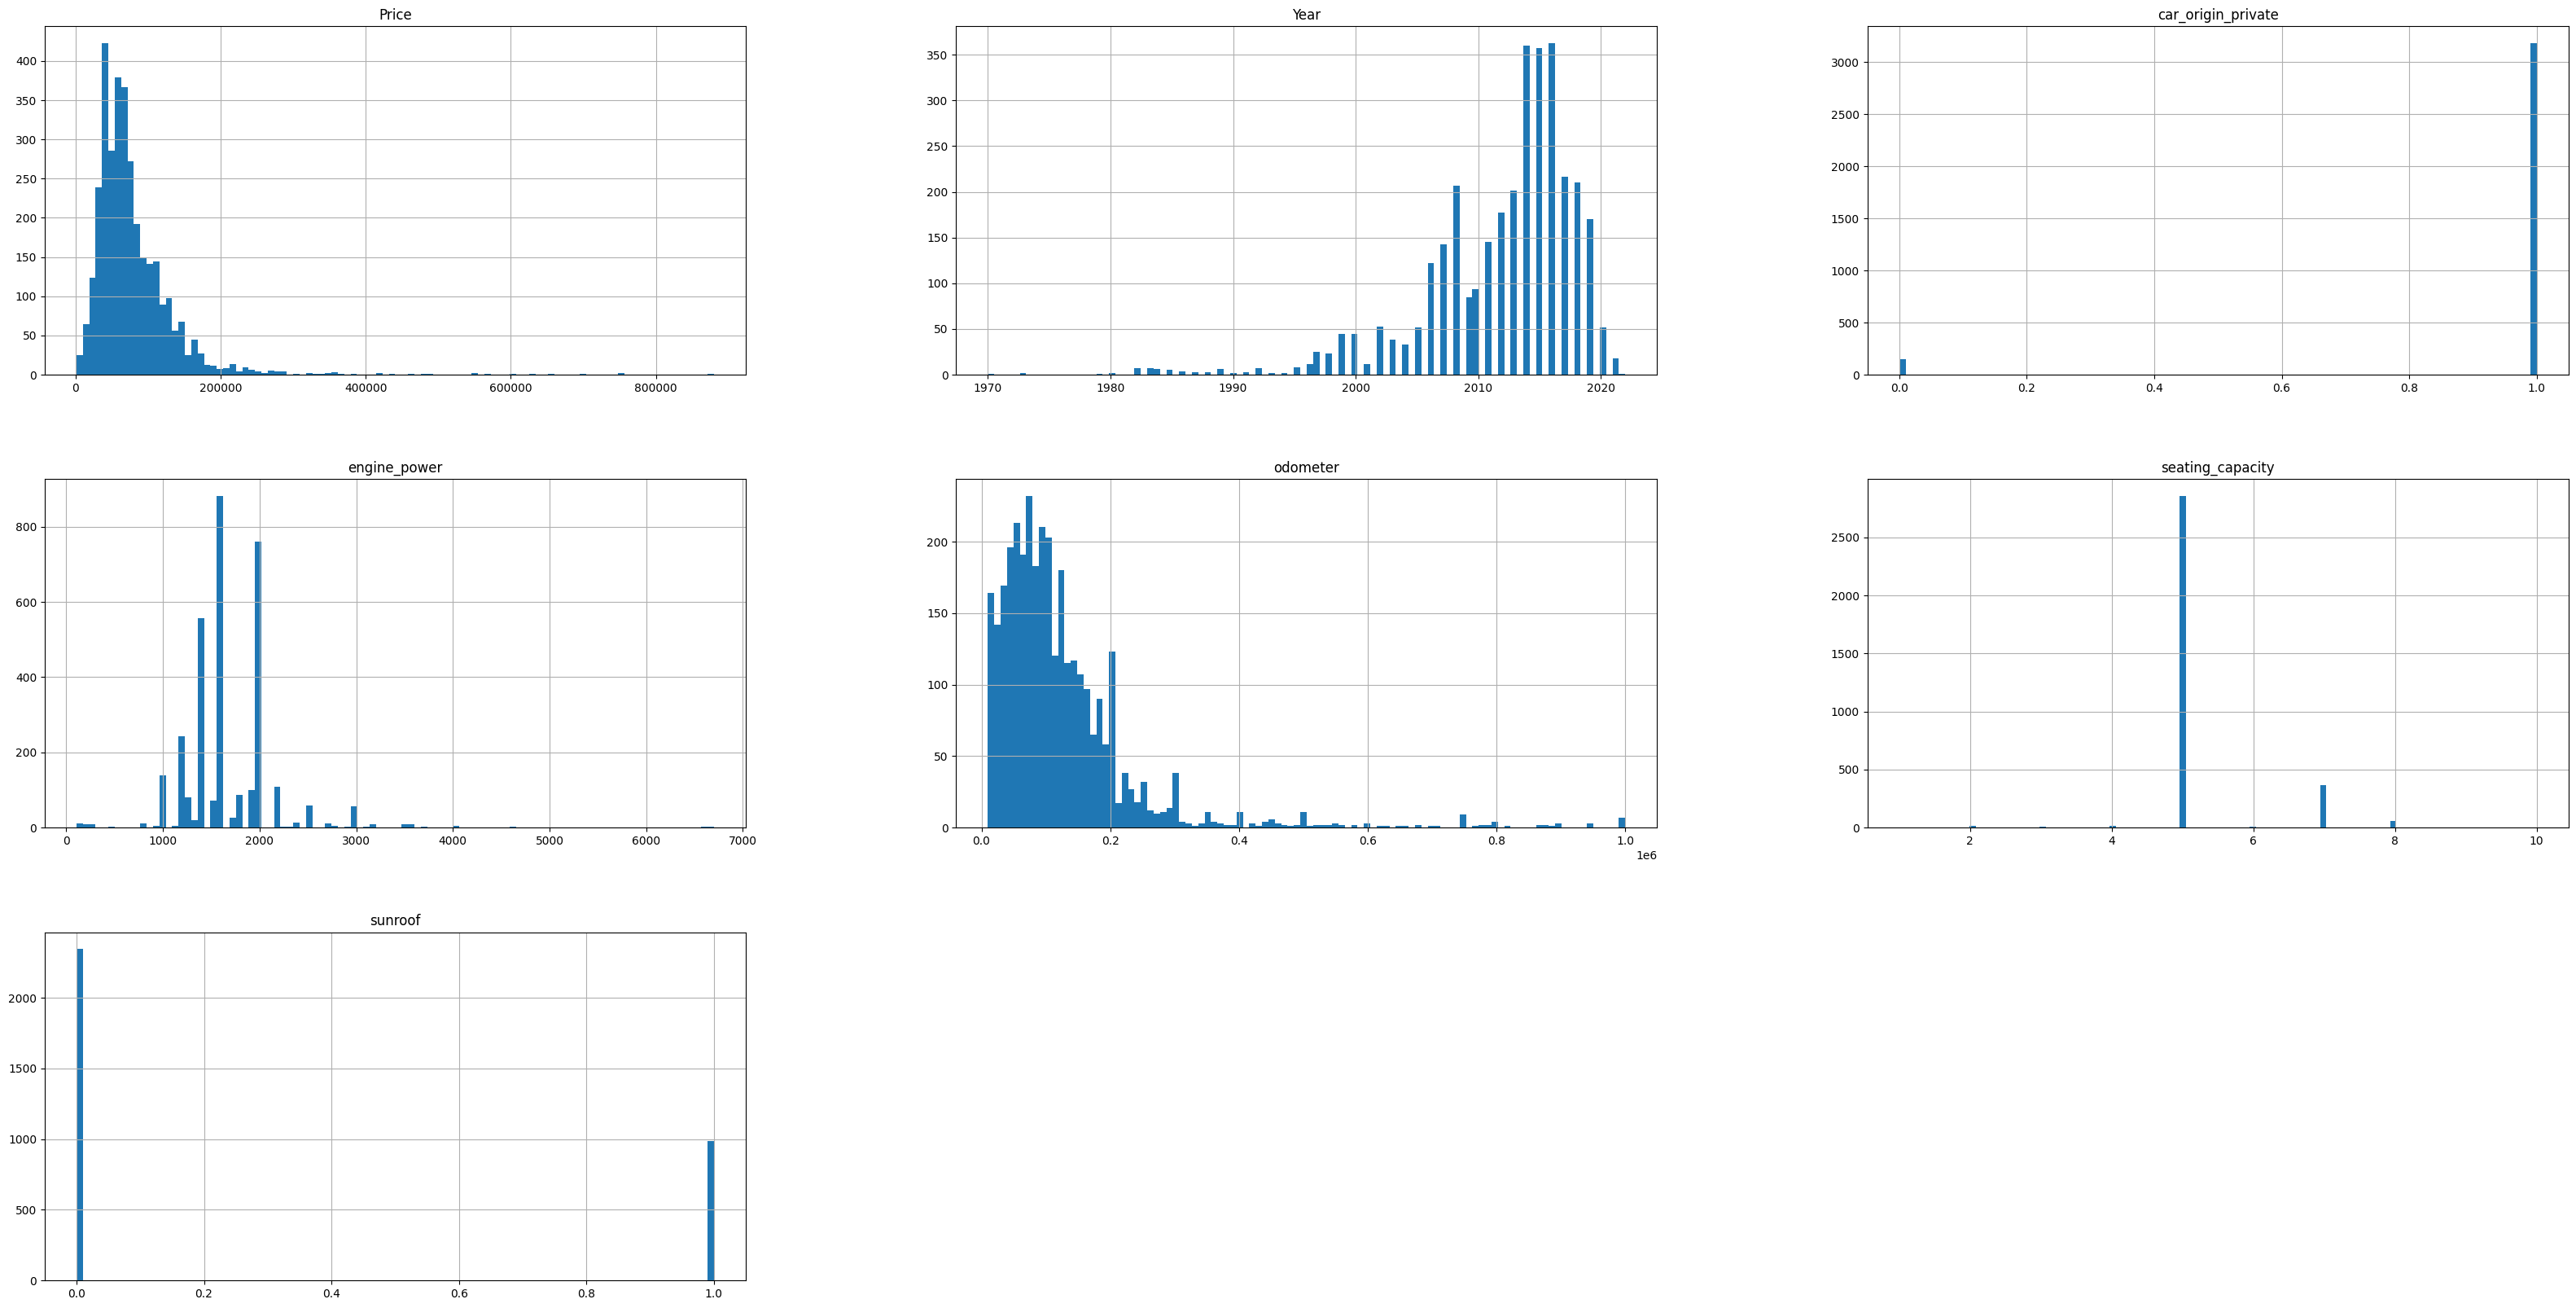

In [145]:
df.hist(bins=100,figsize=(40,20))
plt.show()

In [146]:
df

,Price,Year,gas_type,car_origin_private,gear_type,engine_power,odometer,seating_capacity,sunroof,car_brand,car_model
0,100000,2014.0,بنزين,1,اوتوماتيك,2000.0,75000.0,5.0,1,كيا,اوبتيما
7,54000,2014.0,بنزين,1,اوتوماتيك,1200.0,38000.0,5.0,0,بيجو,208
10,230000,2014.0,بنزين,1,اوتوماتيك,2000.0,50000.0,5.0,1,مرسيدس,C200
14,84000,2003.0,بنزين,1,عادي,4500.0,56000.0,8.0,0,نيسان,باترول
15,75000,2005.0,ديزل,1,عادي,2500.0,460000.0,8.0,0,فورد,ترانزيت
...,...,...,...,...,...,...,...,...,...,...,...
7763,172000,2019.0,بنزين,1,اوتوماتيك,2000.0,40000.0,5.0,1,فولكسفاجن,تيجوان
7764,70000,2003.0,ديزل,1,اوتوماتيك,2700.0,20000.0,5.0,1,مرسيدس,E270
7769,48000,2018.0,بنزين,1,اوتوماتيك,1000.0,50000.0,5.0,0,كيا,بيكانتو
7773,87000,2018.0,ديزل,1,عادي,1600.0,50000.0,5.0,0,بيجو,بارتنر


Outliers

In [147]:
def detect_outliers(group, column):
    q1 = group[column].quantile(0.25)
    q3 = group[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
    return outliers

def process_outliers(group, column):
    outliers = detect_outliers(group, column)
    
    # Drop rows with outliers
    group = group.drop(outliers.index, axis=0)
    
    return group

def process_outlier(column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > 3)
    df[column] = np.where(outliers, df[column].median(), df[column])

def replace_to_none(group):
    group = process_outliers(group, 'Price')
    return group
process_outlier('Price')
df = df.groupby('car_model', group_keys=False).apply(replace_to_none)

In [148]:
df

,Price,Year,gas_type,car_origin_private,gear_type,engine_power,odometer,seating_capacity,sunroof,car_brand,car_model
5062,97000.0,2016.0,ديزل,1,اوتوماتيك,2000.0,110000.0,7.0,0,BMW,/ D 218
1400,5500.0,1984.0,بنزين,1,عادي,905.0,125000.0,5.0,0,فيات,127
3989,8000.0,1980.0,بنزين,1,عادي,1050.0,56700.0,5.0,0,فيات,127
4021,5500.0,1980.0,بنزين,1,عادي,1600.0,75000.0,5.0,0,فيات,131 ستيشن
1738,125000.0,2008.0,ديزل,1,عادي,4000.0,200000.0,3.0,0,أفيكو,150E25
...,...,...,...,...,...,...,...,...,...,...,...
5049,90000.0,2018.0,بنزين,1,اوتوماتيك,1600.0,15000.0,7.0,1,سانغ,يونغ ركستون
6899,45000.0,2008.0,ديزل,1,اوتوماتيك,2700.0,180000.0,7.0,1,سانغ,يونغ ركستون
7745,65000.0,2008.0,ديزل,1,اوتوماتيك,2700.0,222222.0,7.0,1,سانغ,يونغ ركستون
6286,125000.0,2012.0,بنزين,1,اوتوماتيك,2000.0,190000.0,5.0,1,BMW,٢٠١٢


In [149]:
# Assuming df is your DataFrame

# Use get_dummies to convert categorical columns to binary columns
df = pd.get_dummies(df, columns=["car_brand", "car_model", "gas_type", "gear_type"])

# Convert boolean values to integers (0 or 1)
df = df.astype(int)


In [150]:
df

,Price,Year,car_origin_private,engine_power,odometer,seating_capacity,sunroof,car_brand_BMW,car_brand_Dodge,car_brand_GMC,...,car_model_هيلاكس,car_model_وينر,car_model_يتي,car_model_يونغ ركستون,car_model_٢٠١٢,car_model_٢٠١٥,gas_type_بنزين,gas_type_ديزل,gear_type_اوتوماتيك,gear_type_عادي
5062,97000,2016,1,2000,110000,7,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1400,5500,1984,1,905,125000,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3989,8000,1980,1,1050,56700,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4021,5500,1980,1,1600,75000,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1738,125000,2008,1,4000,200000,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,90000,2018,1,1600,15000,7,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6899,45000,2008,1,2700,180000,7,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
7745,65000,2008,1,2700,222222,7,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
6286,125000,2012,1,2000,190000,5,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [156]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X = df.drop(columns=["Price"])
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
print(poly_reg.score(X_poly, y_train))

knn_reg = KNeighborsRegressor(n_neighbors=2)  
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_train, y_train))

dt_reg = DecisionTreeRegressor(max_depth=5)  
dt_reg.fit(X_train, y_train)
print(dt_reg.score(X_train, y_train))




0.8507632751146066
0.790086805133223
0.6919125938776
